In [ ]:
#!pip install confustion matrix

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# 1. Forest Dataset
forest = pd.read_csv(r"/content/forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forest.shape

(517, 31)

In [6]:
f1 = forest.iloc[:,0:11]
forest2 = pd.concat([f1,forest['size_category']],axis=1)
forest2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [7]:
#Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
forest2['month']= label_encoder.fit_transform(forest2['month']) 
forest2['day']= label_encoder.fit_transform(forest2['day'])
forest2['size_category']= label_encoder.fit_transform(forest2['size_category'])

In [8]:
forest2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [9]:
x=forest2.iloc[:,0:11]
y=forest2.iloc[:,-1]
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


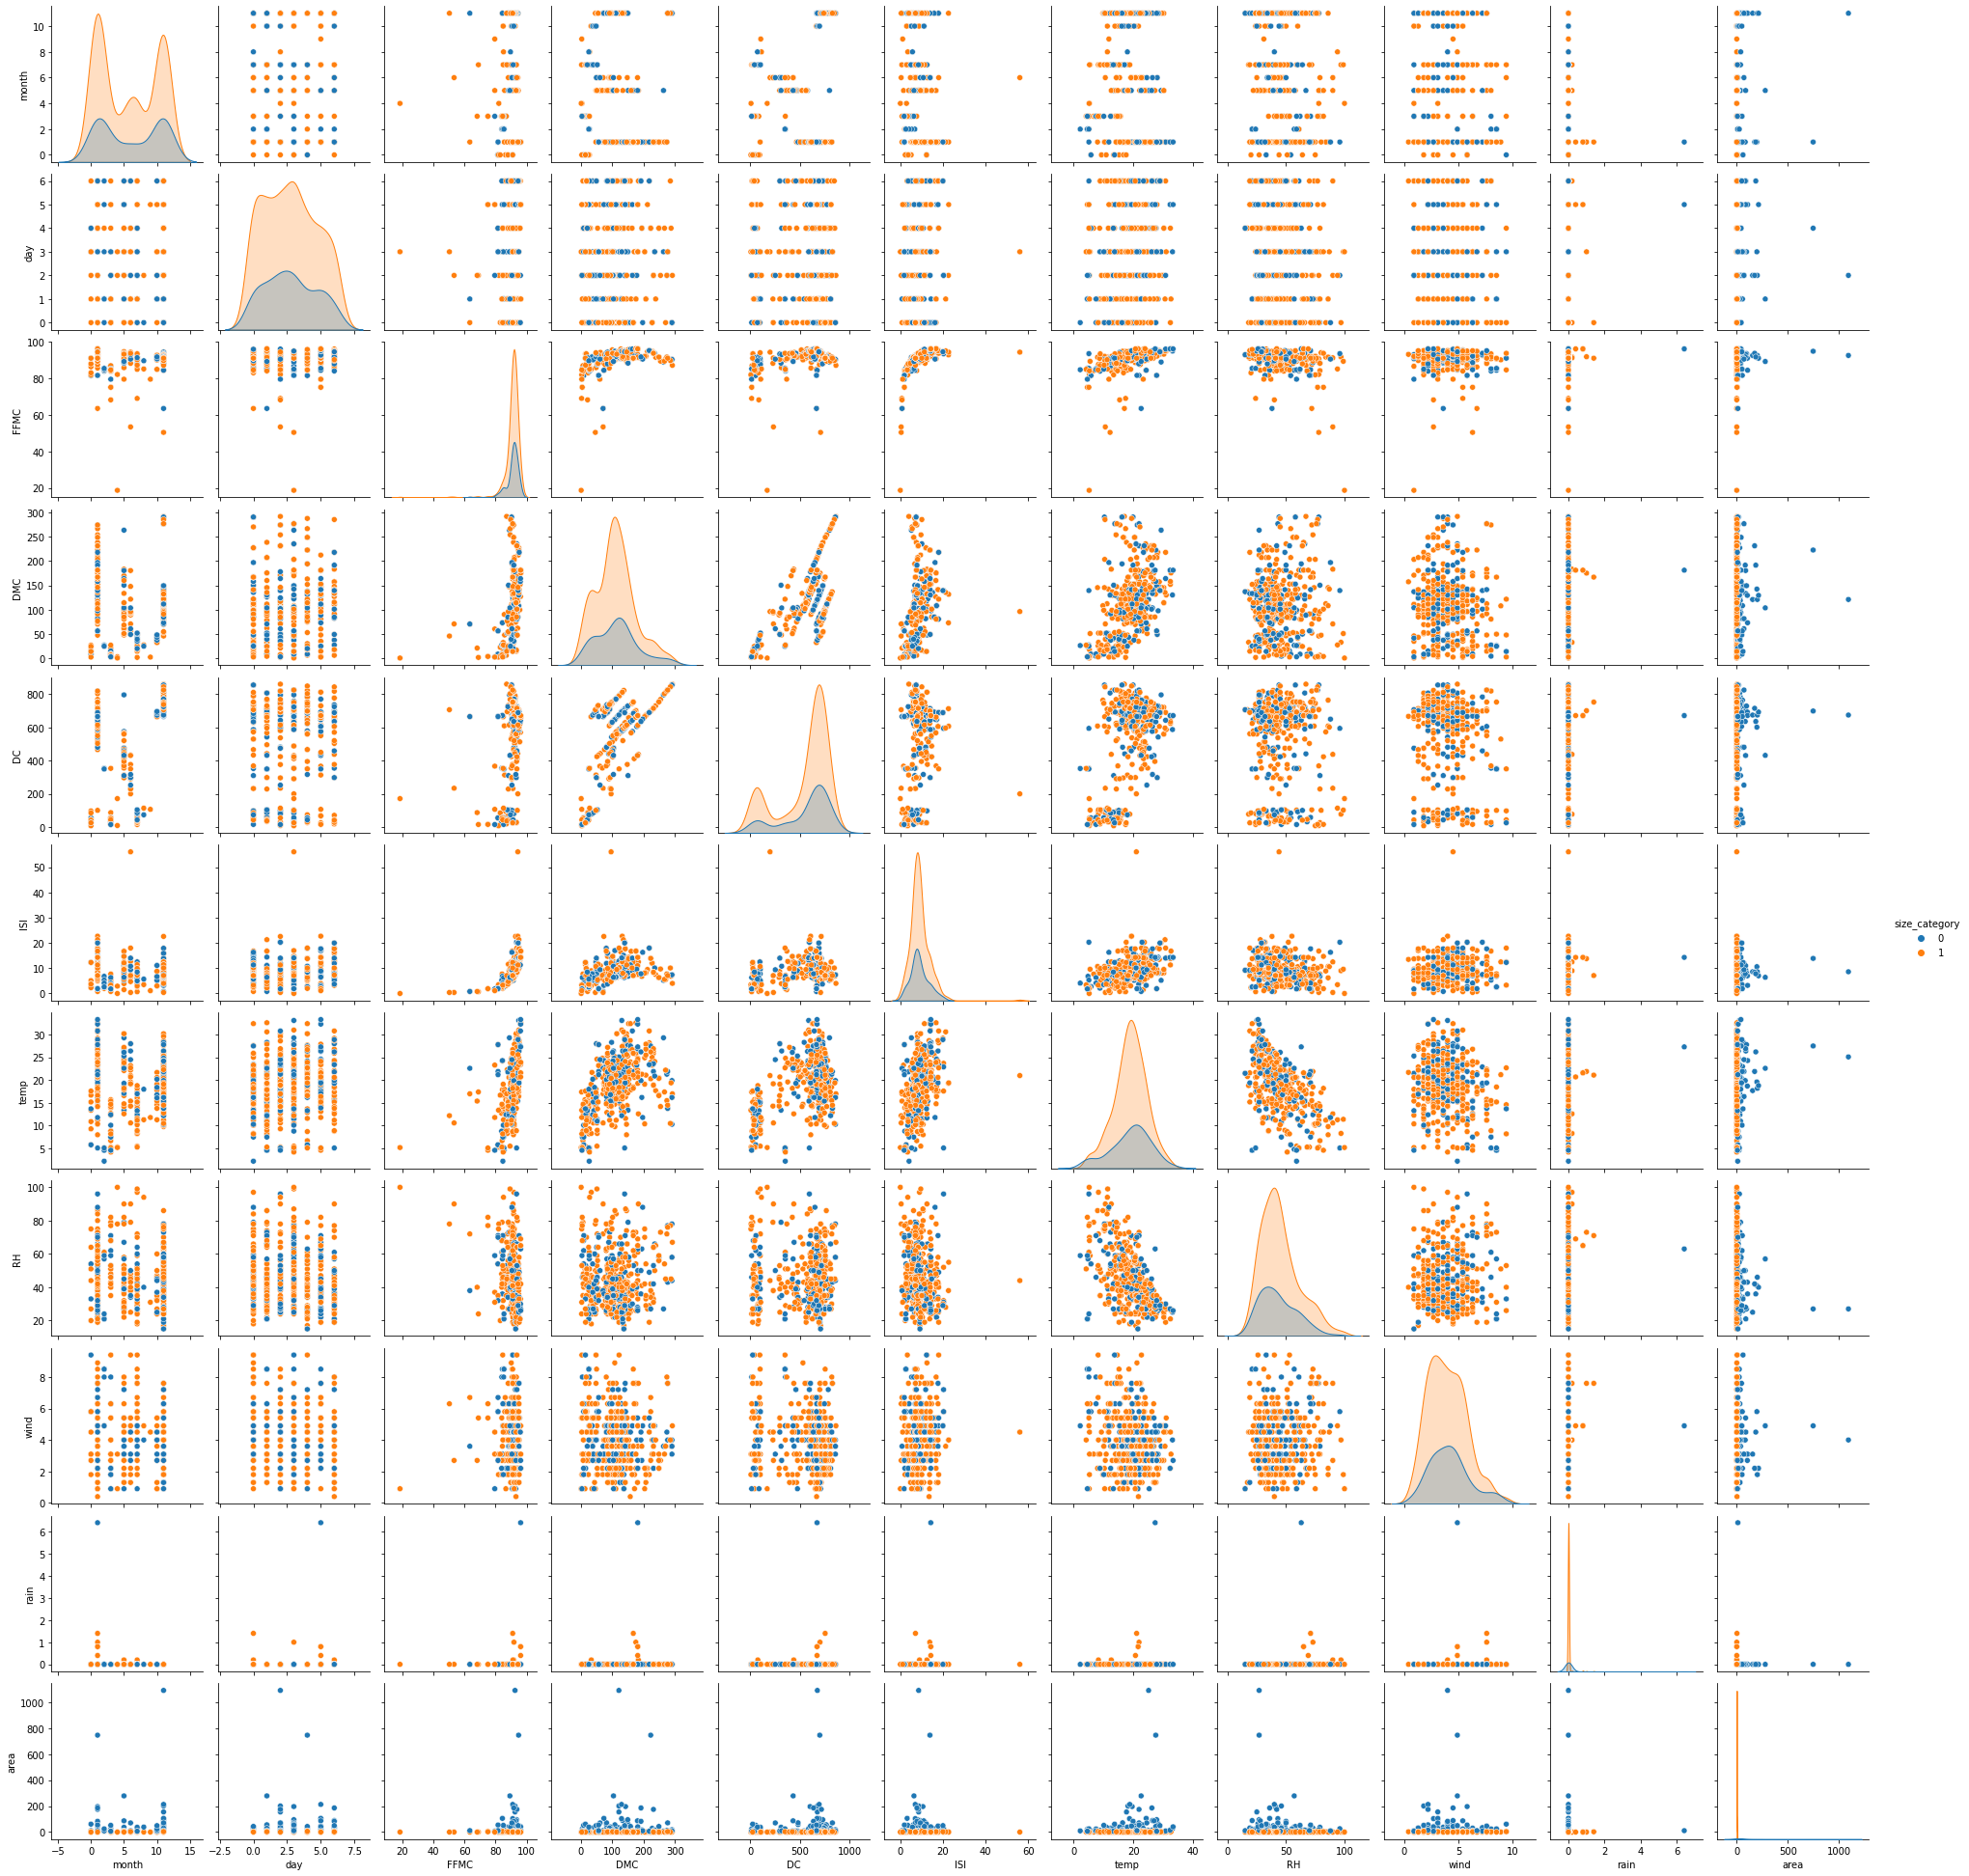

In [10]:
# Visualization
sns.pairplot(forest2, hue='size_category')
plt.show()

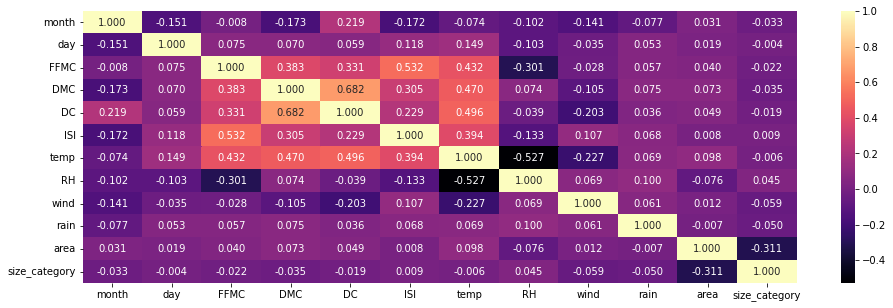

In [11]:
plt.figure(figsize = (16, 5));
sns.heatmap(forest2.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

In [12]:
# Support Vector Machines
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.28)
print("shape of X_train= ",x_train.shape)
print("shape of X_test= ",x_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of X_train=  (372, 11)
shape of X_test=  (145, 11)
shape of y_train=  (372,)
shape of y_test=  (145,)


In [13]:
# Grid Search CV
clf = SVC()

parameters = {'kernel':['rbf'],
               'gamma':[100, 75, 50, 45, 22, 5, 0.5, 0.1, 0.01, 0.0001],
               'C':[50, 35, 15, 12, 10, 6, 5, 0.1, 0.001]}

gsv = GridSearchCV(clf, param_grid = parameters, cv=10)

gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 35, 15, 12, 10, 6, 5, 0.1, 0.001],
                         'gamma': [100, 75, 50, 45, 22, 5, 0.5, 0.1, 0.01,
                                   0.0001],
                         'kernel': ['rbf']})

In [14]:

gsv.best_params_

{'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}

In [15]:
gsv.best_score_

0.938406827880512

In [16]:
model = SVC(C = 50, gamma = 0.0001)
model.fit(x_train , y_train)

SVC(C=50, gamma=0.0001)

In [17]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [18]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 90.3448275862069


In [19]:
confusion_matrix(y_test, y_pred)

array([[ 31,  12],
       [  2, 100]])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82        43
           1       0.89      0.98      0.93       102

    accuracy                           0.90       145
   macro avg       0.92      0.85      0.88       145
weighted avg       0.91      0.90      0.90       145



# The Accuracy is 93.10%